In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 

# estbalish csv path
survey_data_path = '../resources/survey-data.csv'

# read csv in as a pandas data frame
survey_data_df = pd.read_csv(survey_data_path)

# check if csv was read in correctly
survey_data_df.head()

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,IL,NaN,No,Yes,Often,2-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,NaN,No,No,Rarely,2-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


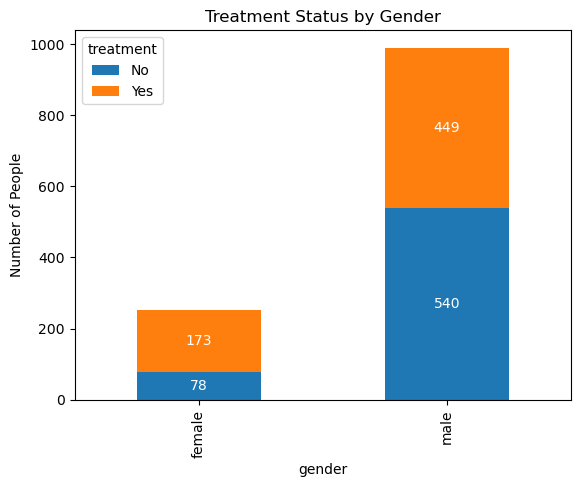

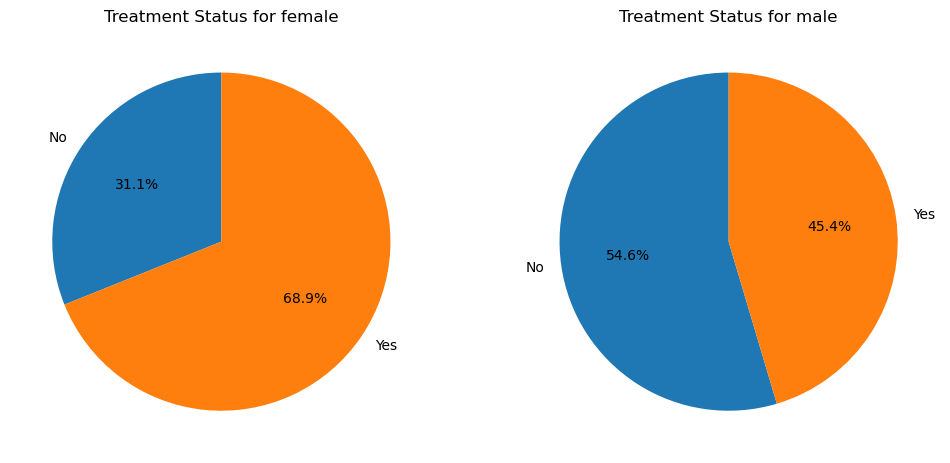

treatment   No  Yes
gender             
female      78  173
male       540  449
Chi-square value: 43.38082643958715
P-value: 4.5058162382400003e-11
Critical value: 3.841458820694124
Reject the null hypothesis


In [2]:
# groupby 'gender' and 'treatment', and count occurrences
gender_treatment_counts = survey_data_df.groupby(['gender', 'treatment']).size().unstack().fillna(0)

# plot bar chart
ax = gender_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Gender')

# add annotations to bars within the bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

# plot pie chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, gender in enumerate(gender_treatment_counts.index):
    gender_data = gender_treatment_counts.loc[gender]
    axes[i].pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Treatment Status for {gender}')

# show charts
plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['gender'], survey_data_df['treatment'])
print(contingency_table)

# perform chi-square test
chi2, p, _, expected = st.chi2_contingency(contingency_table)

# calculate critical value
alpha = 0.05  # choose your significance level
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
critical_value = st.chi2.ppf(1 - alpha, degrees_of_freedom)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Critical value: {critical_value}")

# compare chi2 and critical_value for decision
if chi2 > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

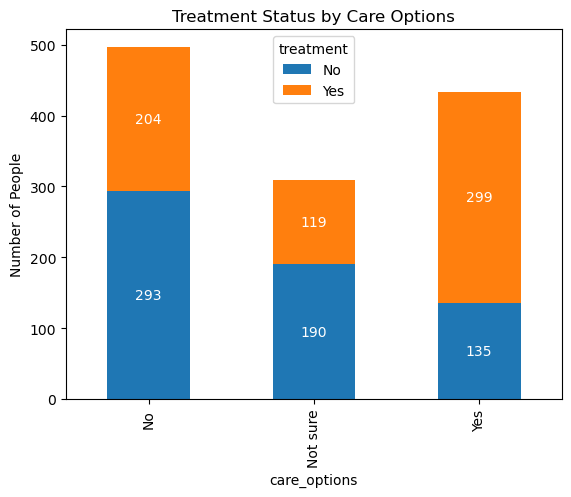

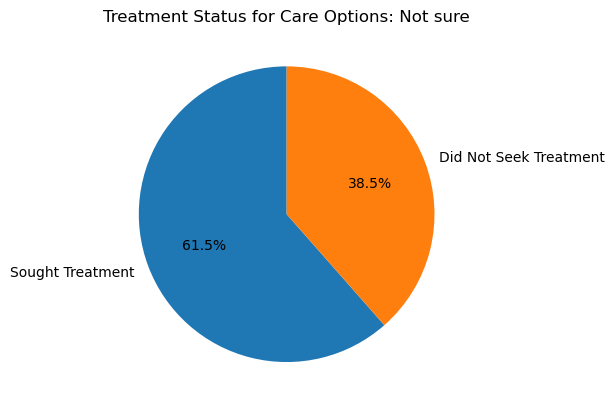

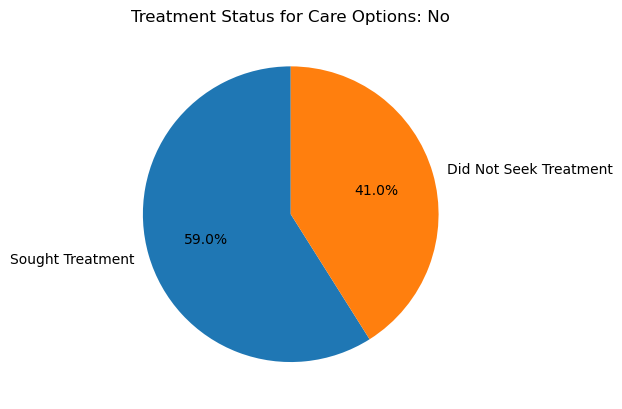

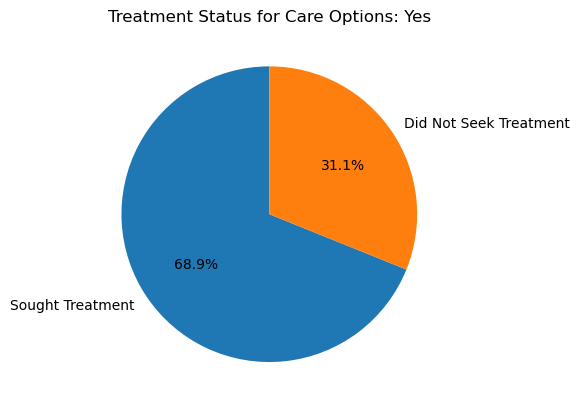

treatment      No  Yes
care_options          
No            293  204
Not sure      190  119
Yes           135  299
Chi-square value: 94.21196897021589
P-value: 3.484423013856505e-21
Critical value: 5.991464547107979
Reject the null hypothesis


In [3]:
# groupby 'care_options' and 'treatment', and count occurrences
care_options_treatment_counts = survey_data_df.groupby(['care_options', 'treatment']).size().unstack().fillna(0)

# Plot bar chart
ax = care_options_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Care Options')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

care_options = survey_data_df['care_options'].unique()

for option in care_options:
    option_data = survey_data_df[survey_data_df['care_options'] == option]['treatment'].value_counts()
    
    fig, ax = plt.subplots()
    ax.pie(option_data, labels=['Sought Treatment', 'Did Not Seek Treatment'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Treatment Status for Care Options: {option}')
    plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['care_options'], survey_data_df['treatment'])
print(contingency_table)

# perform chi-square test
chi2, p, _, expected = st.chi2_contingency(contingency_table)

# calculate critical value
alpha = 0.05  # choose your significance level
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
critical_value = st.chi2.ppf(1 - alpha, degrees_of_freedom)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Critical value: {critical_value}")

# compare chi2 and critical_value for decision
if chi2 > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

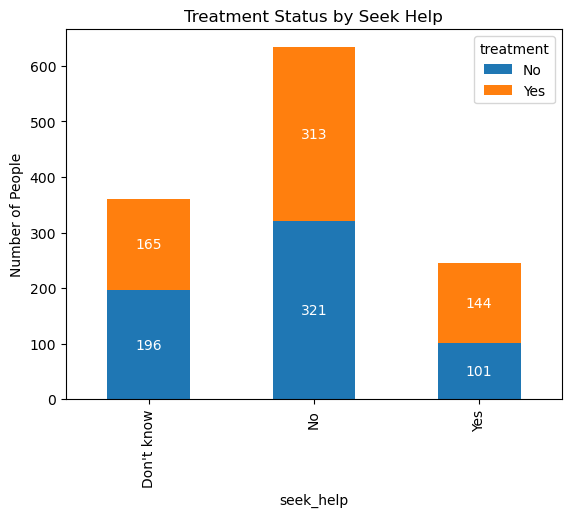

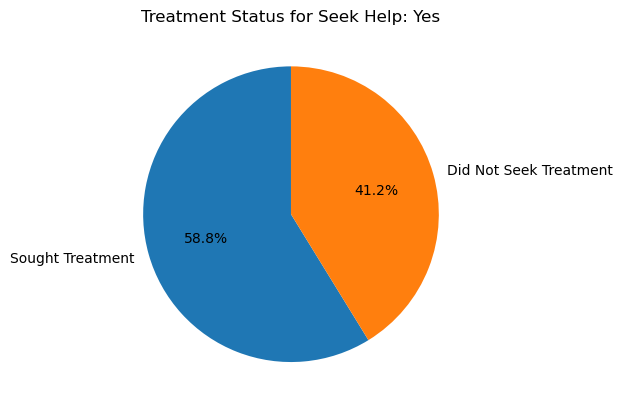

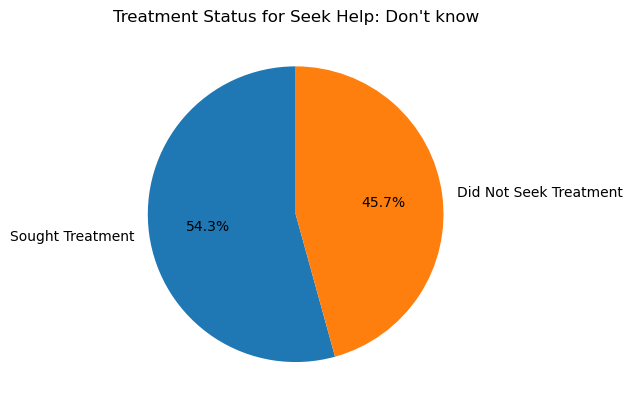

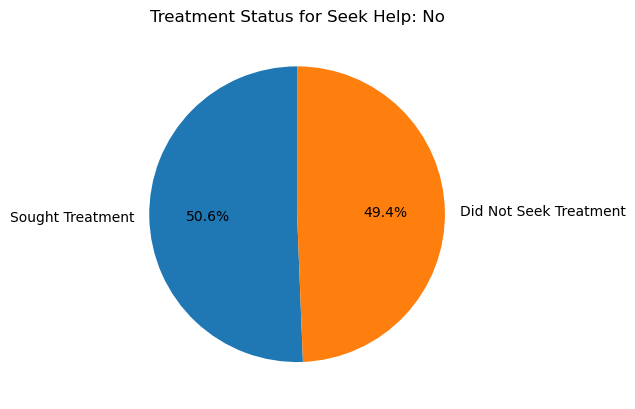

treatment    No  Yes
seek_help           
Don't know  196  165
No          321  313
Yes         101  144
Chi-square value: 10.2971389336884
P-value: 0.005807706904442143
Critical value: 5.991464547107979
Reject the null hypothesis


In [4]:
# groupby 'seek_help' and 'treatment', and count occurrences
seekhelp_treatment_counts = survey_data_df.groupby(['seek_help', 'treatment']).size().unstack().fillna(0)

# Plot bar chart
ax = seekhelp_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Seek Help')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

seekhelp_options = survey_data_df['seek_help'].unique()

for option in seekhelp_options:
    seekhelp_option_data = survey_data_df[survey_data_df['seek_help'] == option]['treatment'].value_counts()
    
    fig, ax = plt.subplots()
    ax.pie(seekhelp_option_data, labels=['Sought Treatment', 'Did Not Seek Treatment'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Treatment Status for Seek Help: {option}')
    plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['seek_help'], survey_data_df['treatment'])
print(contingency_table)

# perform chi-square test
chi2, p, _, expected = st.chi2_contingency(contingency_table)

# calculate critical value
alpha = 0.05  # choose your significance level
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
critical_value = st.chi2.ppf(1 - alpha, degrees_of_freedom)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Critical value: {critical_value}")

# compare chi2 and critical_value for decision
if chi2 > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

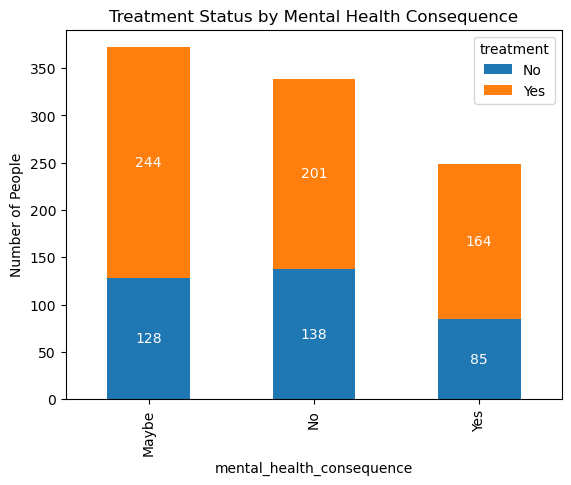

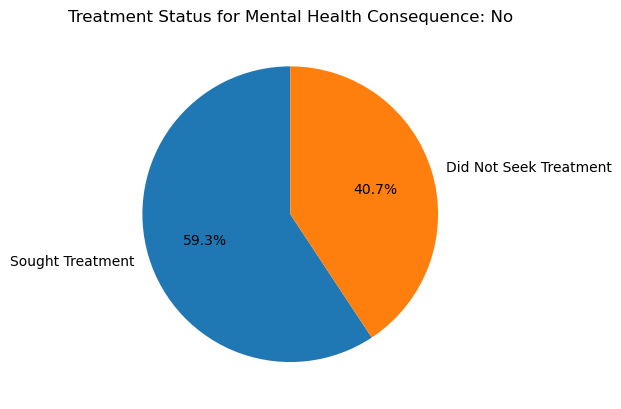

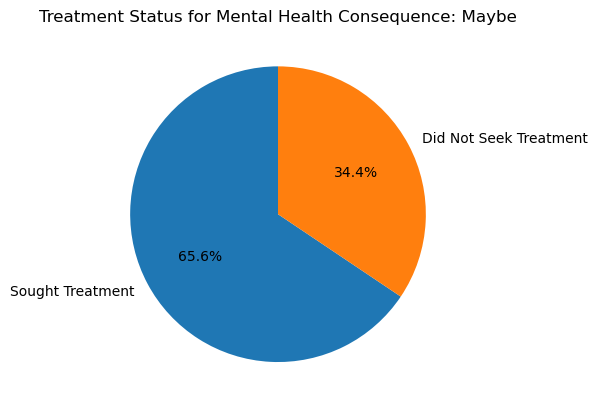

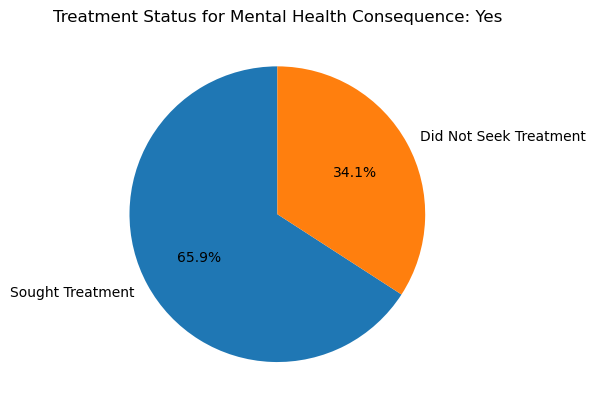

treatment                   No  Yes
mental_health_consequence          
Maybe                      128  244
No                         138  201
Yes                         85  164
Chi-square value: 3.8875489368976965
P-value: 0.1431625661138112
Critical value: 5.991464547107979
Fail to reject the null hypothesis


In [14]:
# groupby 'mental_health_consequence' and 'treatment', and count occurrences
mhc_treatment_counts = survey_data_df.groupby(['mental_health_consequence', 'treatment']).size().unstack().fillna(0)

# Plot bar chart
ax = mhc_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Mental Health Consequence')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

mhc_options = survey_data_df['mental_health_consequence'].unique()

for option in mhc_options:
    mhc_option_data = survey_data_df[survey_data_df['mental_health_consequence'] == option]['treatment'].value_counts()
    
    fig, ax = plt.subplots()
    ax.pie(mhc_option_data, labels=['Sought Treatment', 'Did Not Seek Treatment'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Treatment Status for Mental Health Consequence: {option}')
    plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['mental_health_consequence'], survey_data_df['treatment'])
print(contingency_table)

# perform chi-square test
chi2, p, _, expected = st.chi2_contingency(contingency_table)

# calculate critical value
alpha = 0.05  # choose your significance level
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
critical_value = st.chi2.ppf(1 - alpha, degrees_of_freedom)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Critical value: {critical_value}")

# compare chi2 and critical_value for decision
if chi2 > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

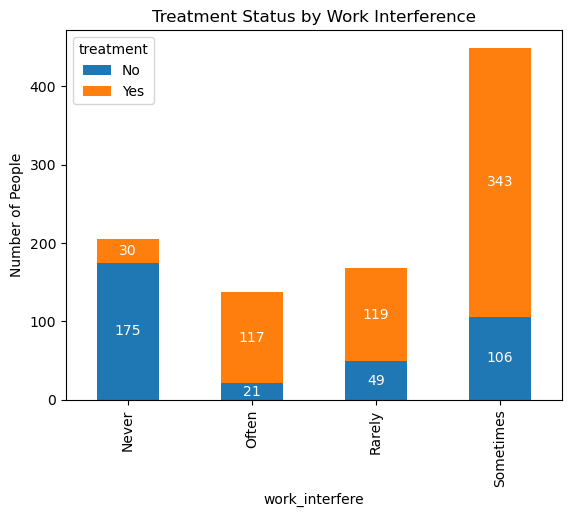

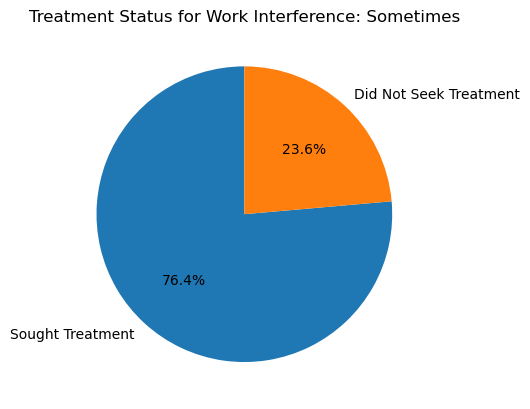

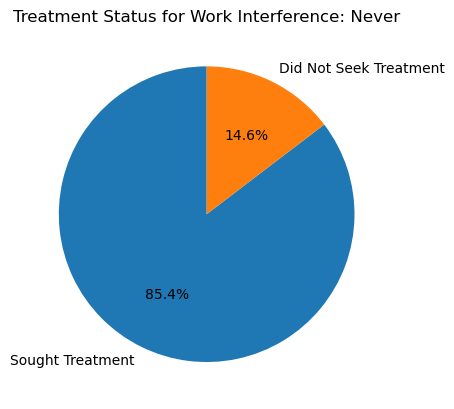

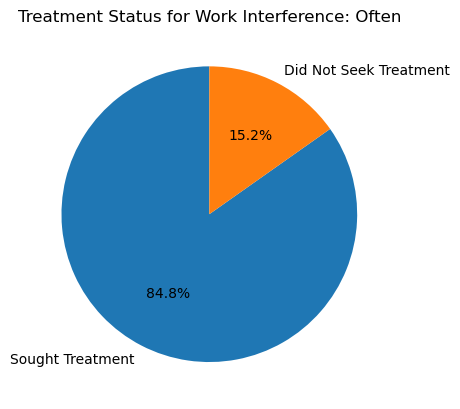

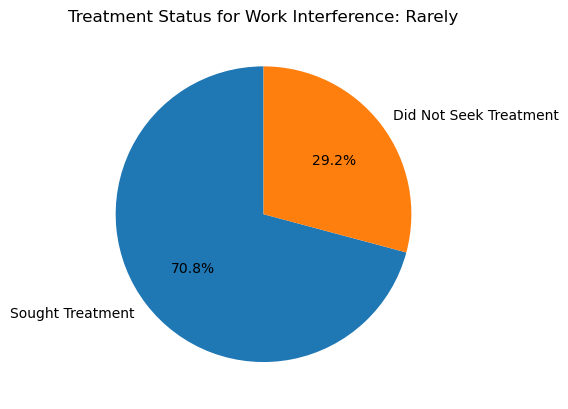

treatment        No  Yes
work_interfere          
Never           175   30
Often            21  117
Rarely           49  119
Sometimes       106  343
Chi-square value: 274.06555980185834
P-value: 4.072519727343173e-59
Critical value: 7.814727903251179
Reject the null hypothesis


In [15]:
#drop nan values from work_interfere column
survey_data_df = survey_data_df.dropna(subset=['work_interfere', 'treatment'])

# groupby 'work_interfere' and 'treatment', and count occurrences
workinter_treatment_counts = survey_data_df.groupby(['work_interfere', 'treatment']).size().unstack().fillna(0)

# Plot bar chart
ax = workinter_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Work Interference')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

workinter_options = survey_data_df['work_interfere'].unique()

for option in workinter_options:
    workinter_option_data = survey_data_df[survey_data_df['work_interfere'] == option]['treatment'].value_counts()
    
    fig, ax = plt.subplots()
    ax.pie(workinter_option_data, labels=['Sought Treatment', 'Did Not Seek Treatment'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Treatment Status for Work Interference: {option}')
    plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['work_interfere'], survey_data_df['treatment'])
print(contingency_table)

# perform chi-square test
chi2, p, _, expected = st.chi2_contingency(contingency_table)

# calculate critical value
alpha = 0.05  # choose your significance level
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
critical_value = st.chi2.ppf(1 - alpha, degrees_of_freedom)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Critical value: {critical_value}")

# compare chi2 and critical_value for decision
if chi2 > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

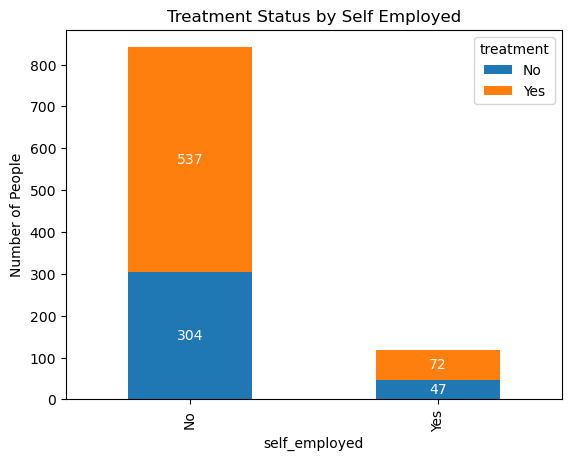

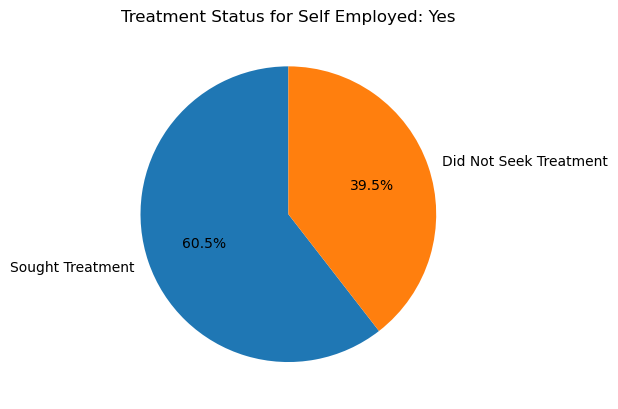

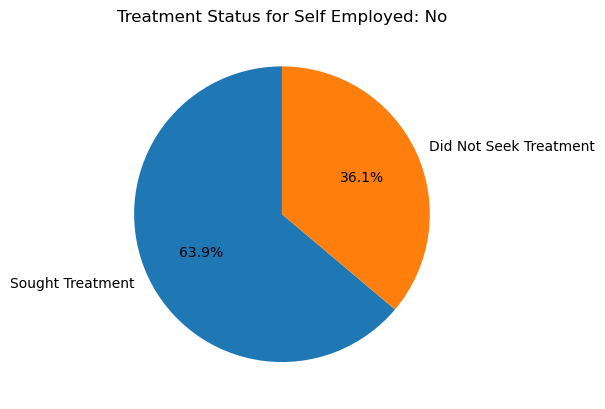

treatment       No  Yes
self_employed          
No             304  537
Yes             47   72
Chi-square value: 0.36988800825369983
P-value: 0.5430653195582454
Critical value: 3.841458820694124
Fail to reject the null hypothesis


In [18]:
#drop nan values from self_employed column
survey_data_df = survey_data_df.dropna(subset=['self_employed', 'treatment'])

# Group by 'self_employed' and 'treatment', and count occurrences
self_employed_treatment_counts = survey_data_df.groupby(['self_employed', 'treatment']).size().unstack().fillna(0)

# Plot bar chart
ax = self_employed_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Self Employed')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

self_employed_options = survey_data_df['self_employed'].unique()

for option in self_employed_options:
    self_employed_option_data = survey_data_df[survey_data_df['self_employed'] == option]['treatment'].value_counts()
    
    fig, ax = plt.subplots()
    ax.pie(self_employed_option_data, labels=['Sought Treatment', 'Did Not Seek Treatment'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Treatment Status for Self Employed: {option}')
    plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['self_employed'], survey_data_df['treatment'])
print(contingency_table)

# perform chi-square test
chi2, p, _, expected = st.chi2_contingency(contingency_table)

# calculate critical value
alpha = 0.05  # choose your significance level
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
critical_value = st.chi2.ppf(1 - alpha, degrees_of_freedom)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Critical value: {critical_value}")

# compare chi2 and critical_value for decision
if chi2 > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

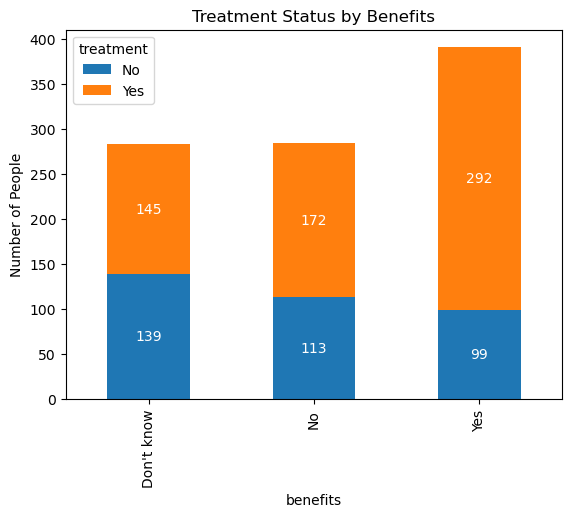

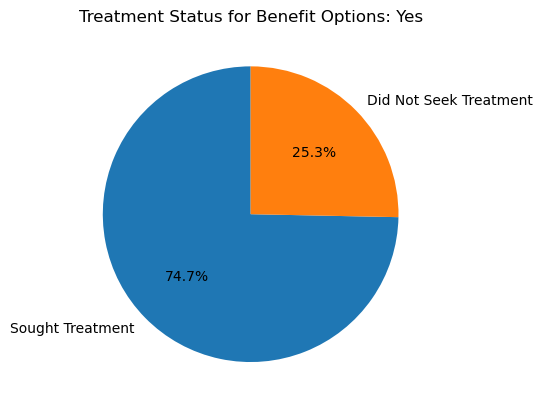

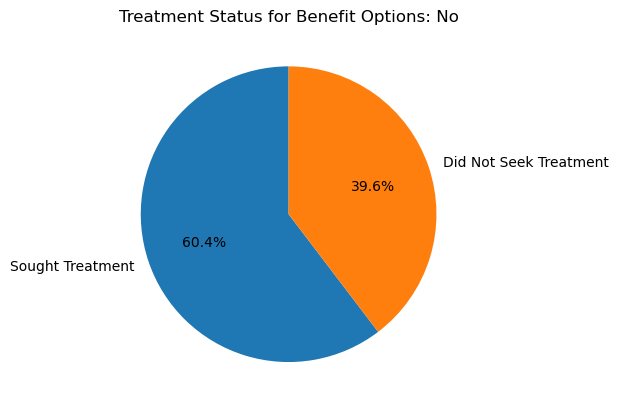

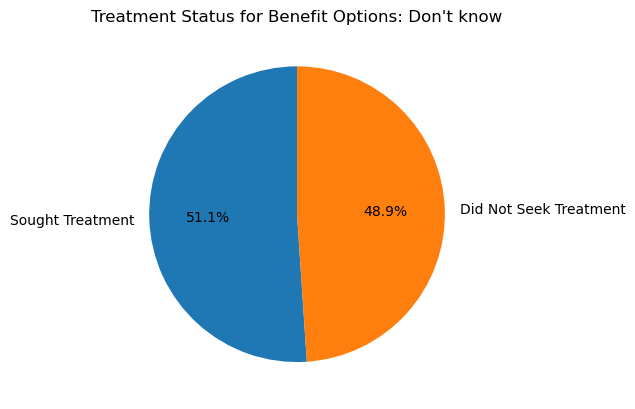

treatment    No  Yes
benefits            
Don't know  139  145
No          113  172
Yes          99  292
Chi-square value: 41.24851904464125
P-value: 1.1040732713464184e-09
Critical value: 5.991464547107979
Reject the null hypothesis


In [21]:
# groupby 'benefits' and 'treatment', and count occurrences
benefits_treatment_counts = survey_data_df.groupby(['benefits', 'treatment']).size().unstack().fillna(0)

# Plot bar chart
ax = benefits_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Benefits')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

benefit_options = survey_data_df['benefits'].unique()

for option in benefit_options:
    option_data = survey_data_df[survey_data_df['benefits'] == option]['treatment'].value_counts()
    
    fig, ax = plt.subplots()
    ax.pie(option_data, labels=['Sought Treatment', 'Did Not Seek Treatment'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Treatment Status for Benefit Options: {option}')
    plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['benefits'], survey_data_df['treatment'])
print(contingency_table)

# perform chi-square test
chi2, p, _, _ = st.chi2_contingency(contingency_table)

# calculate critical value
alpha = 0.05  # choose your significance level
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
critical_value = st.chi2.ppf(1 - alpha, degrees_of_freedom)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Critical value: {critical_value}")

# compare chi2 and critical_value for decision
if chi2 > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

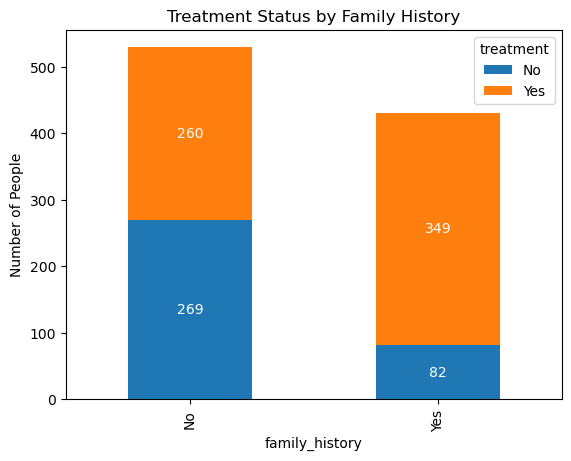

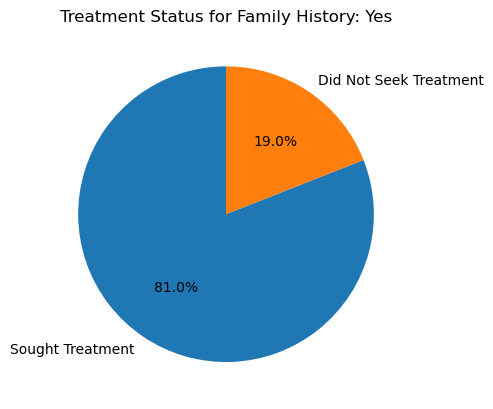

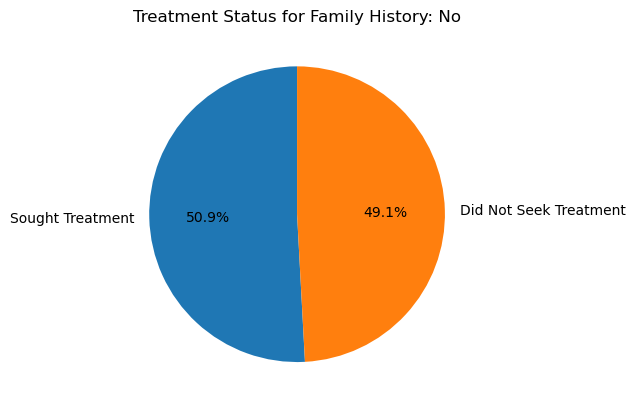

treatment        No  Yes
family_history          
No              269  260
Yes              82  349
Chi-square value: 102.34237424051778
P-value: 4.670932143292043e-24
Critical value: 3.841458820694124
Reject the null hypothesis


In [22]:
# groupby 'family_history' and 'treatment', and count occurrences
fh_treatment_counts = survey_data_df.groupby(['family_history', 'treatment']).size().unstack().fillna(0)

# Plot bar chart
ax = fh_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Family History')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

fh_options = survey_data_df['family_history'].unique()

for option in fh_options:
    fh_option_data = survey_data_df[survey_data_df['family_history'] == option]['treatment'].value_counts()
    
    fig, ax = plt.subplots()
    ax.pie(fh_option_data, labels=['Sought Treatment', 'Did Not Seek Treatment'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Treatment Status for Family History: {option}')
    plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['family_history'], survey_data_df['treatment'])
print(contingency_table)

# perform chi-square test
chi2, p, _, _ = st.chi2_contingency(contingency_table)

# calculate critical value
alpha = 0.05  # choose your significance level
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
critical_value = st.chi2.ppf(1 - alpha, degrees_of_freedom)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Critical value: {critical_value}")

# compare chi2 and critical_value for decision
if chi2 > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")